**Лабораторная работа 1. Прогнозирование моделью линейной регрессии**

**Задание 0. Добавление данных**

Загрузим данные, используя numpy. X - матрица целевых признаков, Y - матрица целевых значений.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
## получение данных

df = pd.read_excel('data.xlsx')
Y = df['Y'].values.reshape(49, 1)
X = df.iloc[:, 2:].values
print('Матрица X и Y', X, Y)

Матрица X и Y [[9.200e+00 1.590e+01 7.800e+00 5.300e+00 1.670e+01 1.690e+02 1.480e+02
  2.270e+01 2.094e+03]
 [7.600e+00 1.640e+01 6.700e+00 4.700e+00 1.550e+01 1.440e+02 1.500e+02
  2.790e+01 1.768e+03]
 [7.300e+00 1.830e+01 6.300e+00 4.900e+00 1.960e+01 1.380e+02 1.330e+02
  3.370e+01 1.982e+03]
 [7.900e+00 1.640e+01 6.800e+00 5.000e+00 1.760e+01 1.970e+02 1.550e+02
  2.660e+01 1.621e+03]
 [7.900e+00 1.700e+01 6.300e+00 4.400e+00 2.010e+01 1.820e+02 1.590e+02
  3.050e+01 1.631e+03]
 [8.000e+00 1.690e+01 8.200e+00 4.600e+00 1.550e+01 5.200e+02 1.970e+02
  1.910e+01 1.066e+03]
 [7.200e+00 1.760e+01 8.100e+00 5.200e+00 1.610e+01 1.430e+02 1.650e+02
  3.120e+01 1.183e+03]
 [8.700e+00 1.600e+01 7.600e+00 4.400e+00 1.890e+01 2.140e+02 1.610e+02
  2.270e+01 1.308e+03]
 [7.800e+00 1.790e+01 7.200e+00 4.300e+00 1.570e+01 1.580e+02 1.630e+02
  2.440e+01 1.475e+03]
 [8.000e+00 1.690e+01 6.900e+00 4.700e+00 1.680e+01 1.850e+02 1.460e+02
  1.980e+01 2.081e+03]
 [7.500e+00 1.940e+01 6.700e+00 4.60

**Задание 1. Нормализация данных.**

Используем Z-нормализацию, так как разброс данных слишком большой.


In [3]:
X = pd.DataFrame(X)
for column in X.columns:
  X[column] = (X[column] - X[column].mean()) / X[column].std()
ones_column = np.ones((X.shape[0], 1))
X = np.hstack((ones_column, X))
X

array([[ 1.        , -0.28097258,  0.54831834,  0.88805794,  0.5393946 ,
        -0.56703787, -0.03166288, -0.35382969, -0.68173374,  0.248116  ],
       [ 1.        , -0.82354033,  0.72719716, -0.93195434,  0.03595964,
        -0.8610575 , -0.4156928 , -0.30943109, -0.24096805, -0.22677077],
       [ 1.        , -0.92527178,  1.40693667, -1.59377699,  0.20377129,
         0.14350958, -0.50785998, -0.68681922,  0.25065521,  0.08496472],
       [ 1.        , -0.72180888,  0.72719716, -0.76649868,  0.28767712,
        -0.34652314,  0.39845064, -0.19843458, -0.35115947, -0.44090683],
       [ 1.        , -0.72180888,  0.94185174, -1.59377699, -0.21575784,
         0.26601777,  0.16803268, -0.10963737, -0.02058521, -0.42633975],
       [ 1.        , -0.6878984 ,  0.90607597,  1.54988059, -0.04794619,
        -0.8610575 ,  5.36011725,  0.73393611, -0.98687921, -1.2493797 ],
       [ 1.        , -0.95918227,  1.15650632,  1.38442493,  0.45548877,
        -0.71404769, -0.431054  ,  0.02355844

Задание 2. Расчет весов линейной регрессии по аналитической формуле.

In [4]:
# получение ковариационной матрицы
cov_mat = np.matmul(np.transpose(X), X)

# получение матрицы -1
inv_mat = np.linalg.inv(cov_mat)

# расчет весов
mat = np.matmul(inv_mat, np.transpose(X))
weights = np.matmul(mat, Y) # получение матрицы весов

print("Полученные веса:", "\n", weights)

Полученные веса: 
 [[58.13061224]
 [-2.40255485]
 [-2.4500539 ]
 [ 0.67582994]
 [-2.13092791]
 [-0.59362218]
 [-0.39965211]
 [-1.06941919]
 [-1.09418984]
 [-0.98486064]]


**Задание 3. Построение и интепретация корреляционной матрицы. Определение степени мультиколлинеарности на основе числа обусловленности.**


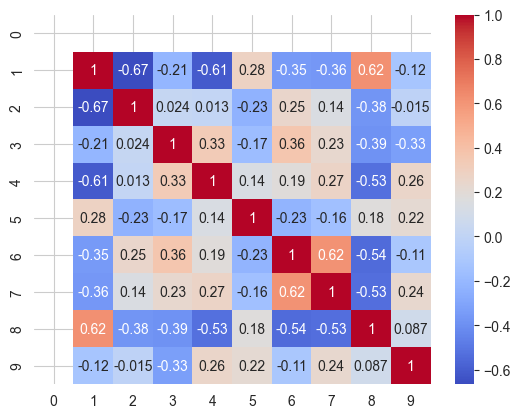

In [5]:
corr_plot = sns.heatmap(pd.DataFrame(X).corr(), cmap="coolwarm", annot=True)

In [6]:
print(f"Число обусловленности: {np.linalg.cond(X, p=2)}")
pd.DataFrame(cov_mat)

Число обусловленности: 7.167690720885988


,0,1,2,3,4,5,6,7,8,9
0,4.900000e+01,7.216450e-16,3.297362e-14,-6.195044e-14,2.331468e-14,1.865175e-14,9.769963e-15,-1.570966e-14,-2.220446e-15,2.553513e-15
1,7.216450e-16,4.800000e+01,-3.198099e+01,-1.019942e+01,-2.922679e+01,1.357463e+01,-1.690592e+01,-1.743094e+01,2.959106e+01,-5.770015e+00
2,3.297362e-14,-3.198099e+01,4.800000e+01,1.154989e+00,6.097932e-01,-1.127150e+01,1.205675e+01,6.826933e+00,-1.821505e+01,-7.128906e-01
3,-6.195044e-14,-1.019942e+01,1.154989e+00,4.800000e+01,1.589965e+01,-8.308249e+00,1.746357e+01,1.116555e+01,-1.871604e+01,-1.591456e+01
4,2.331468e-14,-2.922679e+01,6.097932e-01,1.589965e+01,4.800000e+01,6.673224e+00,8.896314e+00,1.289087e+01,-2.533465e+01,1.231505e+01
5,1.865175e-14,1.357463e+01,-1.127150e+01,-8.308249e+00,6.673224e+00,4.800000e+01,-1.100272e+01,-7.531416e+00,8.529720e+00,1.042696e+01
6,9.769963e-15,-1.690592e+01,1.205675e+01,1.746357e+01,8.896314e+00,-1.100272e+01,4.800000e+01,2.953305e+01,-2.609141e+01,-5.200072e+00
7,-1.570966e-14,-1.743094e+01,6.826933e+00,1.116555e+01,1.289087e+01,-7.531416e+00,2.953305e+01,4.800000e+01,-2.553535e+01,1.135497e+01
8,-2.220446e-15,2.959106e+01,-1.821505e+01,-1.871604e+01,-2.533465e+01,8.529720e+00,-2.609141e+01,-2.553535e+01,4.800000e+01,4.176470e+00
9,2.553513e-15,-5.770015e+00,-7.128906e-01,-1.591456e+01,1.231505e+01,1.042696e+01,-5.200072e+00,1.135497e+01,4.176470e+00,4.800000e+01


Число обусловленности равно 7.16. Такое высокое значение числа обусловленности является индикатором серьезной мультиколлинеарности в данных.


**Задание 4. Анализ регрессионных остатков.**

In [7]:
y_pred = np.matmul(X, weights)
MSE = mean_squared_error(Y, y_pred)
RMSE = MSE ** 0.5
print("RMSE: ", RMSE)

R2_analytics = r2_score(Y, y_pred)
print(f"Коэффициент детерминации: {R2_analytics}")

RMSE:  1.159729049686305
Коэффициент детерминации: 0.8234681200381894


**Задание 5. Определение весов линейной регрессии градиентным методом. Проанализировать изменение ошибки от итерации к итерации.**

In [8]:
# 1. Инициализация весов
weights = np.ones((X.shape[1], 1))
learning_rate = 0.1
S = []

for i in range(1000):
  # 2. Расчет предсказанного значения y_pred по весам w
  y_pred = np.matmul(X, weights)
  delta = Y - y_pred

  # 3. Расчет градиента функции потерь
  curr = 0
  for i in range(Y.shape[0]):
    curr += (pow(Y[i] - y_pred[i], 2))

  S.append((1 / X.shape[0]) * curr)

  # 4. Установка новых  весов
  dS = (-2 / X.shape[0]) * np.transpose(np.matmul(np.transpose(delta), X))
  weights -= learning_rate * dS

for i in range (len(S)):
  print(f"Итерация {i + 1} - {S[i][0]}")

print(f"RMSE: {S[999]**0.5}")
R2_gradient = r2_score(Y, y_pred)
print(f"Коэффициент детерминации: {R2_gradient}")

Итерация 1 - 3285.783292400218
Итерация 2 - 2102.7640745322196
Итерация 3 - 1346.8099397212977
Итерация 4 - 863.3000122240703
Итерация 5 - 553.923470078539
Итерация 6 - 355.91003396570346
Итерация 7 - 229.1382293425377
Итерация 8 - 147.9518571503271
Итерация 9 - 95.94017098618761
Итерация 10 - 62.60395279306547
Итерация 11 - 41.22483982584153
Итерация 12 - 27.503114627137958
Итерация 13 - 18.68655383939268
Итерация 14 - 13.013194435279123
Итерация 15 - 9.354836339833852
Итерация 16 - 6.988936464713573
Итерация 17 - 5.452636818295431
Итерация 18 - 4.449342598540316
Итерация 19 - 3.788926070541983
Итерация 20 - 3.3494491146913683
Итерация 21 - 3.0526577797776056
Итерация 22 - 2.848291704563648
Итерация 23 - 2.7040360462917272
Итерация 24 - 2.599085586386092
Итерация 25 - 2.5200214989798537
Итерация 26 - 2.458168967307442
Итерация 27 - 2.407903164699508
Итерация 28 - 2.3655627030626696
Итерация 29 - 2.3287522830531384
Итерация 30 - 2.2958947796185303
Итерация 31 - 2.265943249767971
Итерац

**Задание 6. Сравнение результатов по аналитическому и градиентному методу.**

Аналитический метод: RMSE: 1.159729049686305

Градиентный метод: RMSE: 1.15972905

Результаты можно считать одинаковыми.

In [9]:
model = LinearRegression().fit(X,Y)
y_pred_from_model = model.predict(X)
MSE = mean_squared_error(Y, y_pred_from_model)
RMSE = MSE ** 0.5
R2_gradient = r2_score(Y, y_pred_from_model)
print('RMSE: ', RMSE)
print(R2_gradient)

RMSE:  1.159729049686306
0.823468120038189


Результат можно считать идентичным.

**Задание 8. С помощью библиотеки statmodels получить «эконометрический» результат обучения модели линейной регрессии. Проинтерпретировать все его составляющие (в т.ч. те, которые изучались только теоретически), сравнить с предыдущими результатами.**

In [10]:
stat_model = sm.OLS(Y, X).fit()
y_pred_from_stat = stat_model.predict(X)
MSE = mean_squared_error(Y, y_pred_from_stat)
RMSE = MSE ** 0.5
print('RMSE: ', RMSE)
print(stat_model.summary())

RMSE:  1.1597290496863057
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     20.21
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           4.44e-12
Time:                        22:41:38   Log-Likelihood:                -76.789
No. Observations:                  49   AIC:                             173.6
Df Residuals:                      39   BIC:                             192.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.1306     